In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

PATH_DIR = "/kaggle/input/animal-image-dataset-90-different-animals"
os.chdir(PATH_DIR)
for item in os.listdir():
  print(item)

animals
name of the animals.txt


# everything we may need later on

In [3]:
from pathlib import Path
import os.path


# Please run this before start using the notebook

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

import numpy as np
print(f"NumPy version: {np.__version__}")

import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

import pandas as pd
print(f"Pandas version: {pd.__version__}")

import sklearn
print(f"Scikit-Learn version: {sklearn.__version__}")

import tf_keras as tfk
print(f"TensorFlow Keras version: {tfk.__version__}")
import matplotlib as matplotlib
import matplotlib.pyplot as plt
print(f"Matplotlib version: {matplotlib.__version__}")
import seaborn as sns
print(f"Seaborn version: {sns.__version__}")

Notebook last run (end-to-end): 2024-10-27 11:41:05.362786
TensorFlow version: 2.16.1
NumPy version: 1.26.4
Matplotlib version: 3.7.5
Pandas version: 2.2.3
Scikit-Learn version: 1.2.2
TensorFlow Keras version: 2.16.0
Matplotlib version: 3.7.5
Seaborn version: 0.12.2


In [4]:
# Define the directory containing the images
image_dir = Path("/kaggle/input/animal-image-dataset-90-different-animals/animals/animals")
image_dir

PosixPath('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals')

In [5]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Combine filepaths and labels into a DataFrame
images = pd.concat([filepaths, labels], axis=1)

# Shuffle the data and reset the index
image_df = images.sample(frac=1.0, random_state=1).reset_index(drop=True)

# Display the final DataFrame
image_df

,Filepath,Label
0,/kaggle/input/animal-image-dataset-90-differen...,wombat
1,/kaggle/input/animal-image-dataset-90-differen...,penguin
2,/kaggle/input/animal-image-dataset-90-differen...,cockroach
3,/kaggle/input/animal-image-dataset-90-differen...,wolf
4,/kaggle/input/animal-image-dataset-90-differen...,moth
...,...,...
5395,/kaggle/input/animal-image-dataset-90-differen...,penguin
5396,/kaggle/input/animal-image-dataset-90-differen...,cat
5397,/kaggle/input/animal-image-dataset-90-differen...,panda
5398,/kaggle/input/animal-image-dataset-90-differen...,wolf


In [6]:
image_df["Label"].value_counts()

Label
wombat        60
pigeon        60
bison         60
beetle        60
cow           60
              ..
duck          60
dog           60
hedgehog      60
bee           60
chimpanzee    60
Name: count, Length: 90, dtype: int64

In [7]:
# Open the file and read its content
with open('/kaggle/input/animal-image-dataset-90-different-animals/name of the animals.txt', 'r') as file:
    content = file.read()

# # Print the content
# print(content)

class_names = content.split("\n")

print("Number of classes:", len(class_names))
print(class_names)

Number of classes: 90
['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from PIL import Image

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)[0]

    # Load the image using PIL and resize it to 224x224
    img = Image.open(os.path.join(target_folder, random_image))
    img = img.resize((224, 224))  # Resize to 224x224 pixels

   
    return img

def view_a_random_images_class(target_dir, target_class):
    print(f"Image class: {target_class}")
    # Create the figure and set the overall title
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))  # Adjust figure size as needed
    fig.suptitle(target_class, fontsize=16)  # Set the title for the entire figure

    target_folder = os.path.join(target_dir, target_class)
    random_images = random.sample(os.listdir(target_folder), 4)  # Select 4 random images
    
    # Loop through each subplot to display the images
    for i in range(4):
        img_path = os.path.join(target_folder, random_images[i])
        img = Image.open(img_path).resize((224, 224))  # Resize to 224x224
        axs[i].imshow(img)
        axs[i].axis("off")  # Hide axes for each subplot

    plt.show()


Image shape: (224, 224)
deer


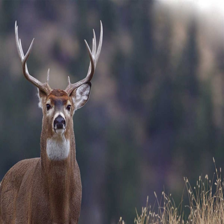

In [9]:
import random

i = random.randrange(len(class_names))

img = view_random_image("/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/", class_names[i])
print(f"Image shape: {img.size}")
print(class_names[i])
img

Image class: owl


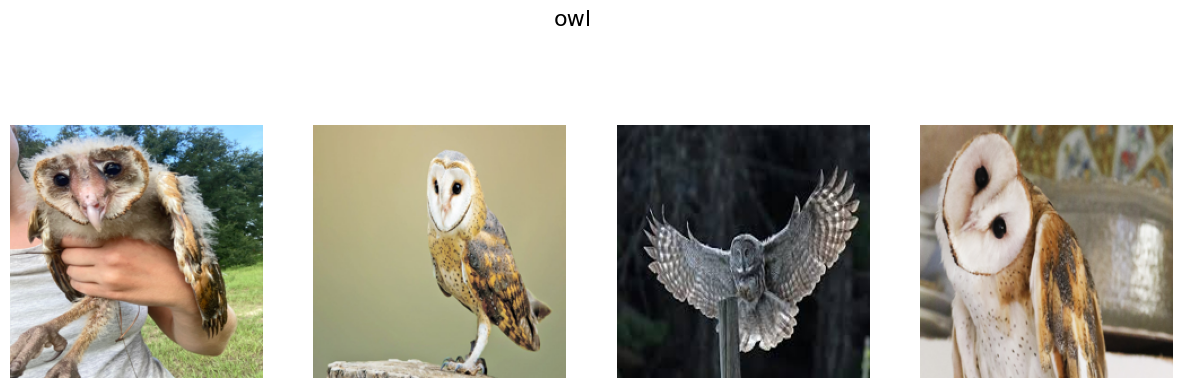

Image class: pelecaniformes


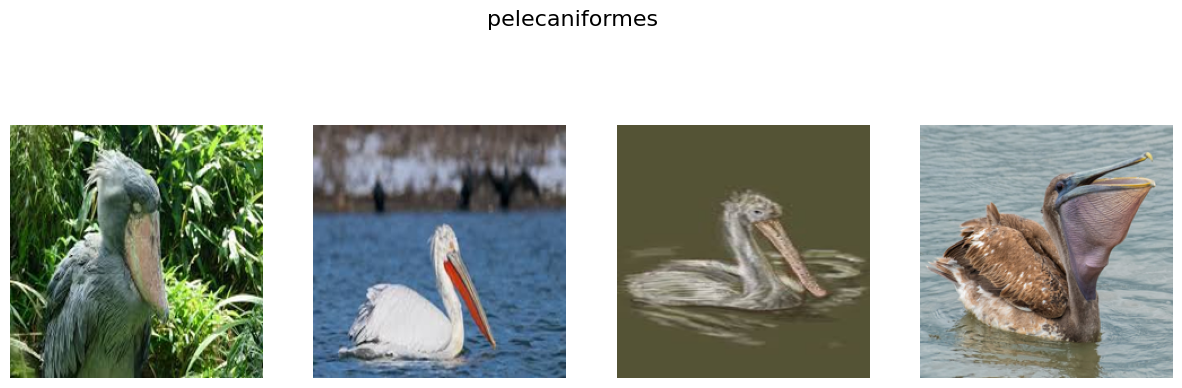

Image class: hippopotamus


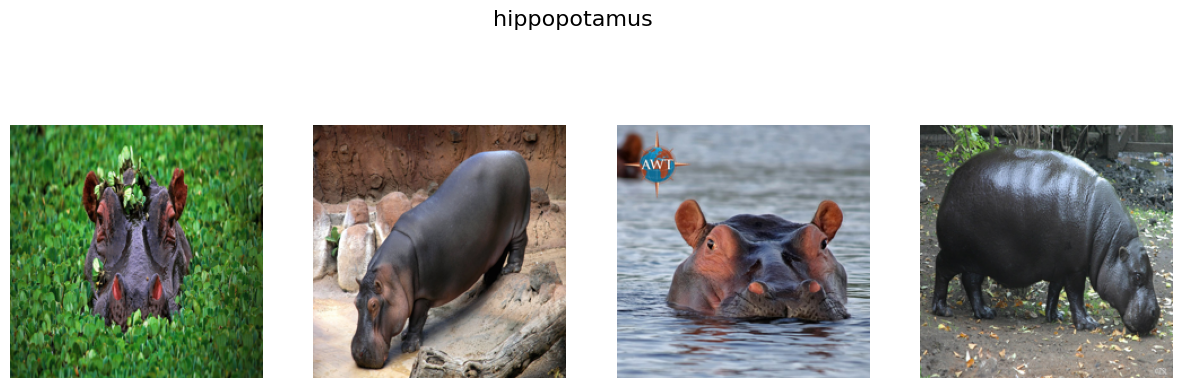

In [10]:
for i in random.sample(range(0, 90), 3):
    view_a_random_images_class(target_dir = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/", target_class = class_names[i])

In [11]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

Training set: 3600 samples
Validation set: 1800 samples
Each class training set: 40.0 samples
Each class validation set: 20.0 samples


Text(0.5, 1.0, 'Percentage of training, validation data')

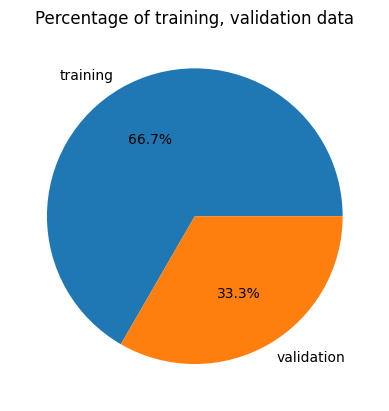

In [12]:
# Assuming 'image_df' contains all the data with 'Filepath' and 'Label' columns
train_df, val_df = train_test_split(image_df, test_size=1/3, random_state=1, stratify=image_df['Label'])

# Print the number of samples in each set
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")


print(f"Each class training set: {len(train_df)/90} samples")
print(f"Each class validation set: {len(val_df)/90} samples")


plot_data = np.array([len(train_df), len(val_df)])

plot_labels = ["training", "validation"]

plt.pie(plot_data, labels=plot_labels, autopct='%1.1f%%')
plt.title('Percentage of training, validation data')

In [13]:
### Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation and test data

# Create the generators for training, validation, and test sets
train_generator = train_datagen.flow_from_dataframe(
    train_df,  # This assumes you split the data into 'train_df', 'val_df', etc.
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    batch_size=30,
    class_mode='categorical',
    shuffle=True,
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    batch_size=30,
    class_mode='categorical',
    shuffle=False,
)

Found 3600 validated image filenames belonging to 90 classes.
Found 1800 validated image filenames belonging to 90 classes.


In [14]:
tf.keras.applications.EfficientNetB7(
    include_top=True,
    weights = 'imagenet',
    input_tensor=None,
    input_shape=(None),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
).summary()

268326632/268326632 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 600, 600,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 600, 600,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 600, 600,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 600, 600,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 601, 601,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 300, 300,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 300, 300,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 300, 300,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 300, 300,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 300, 300,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 300, 300,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 300, 300,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 300, 300,  │      2,048 │ block1a_se_excit

 Total params: 66,658,687 (254.28 MB)

 Trainable params: 66,347,960 (253.10 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [15]:
import tensorflow_hub as hub
import tf_keras as tfk
from tensorflow.keras import regularizers, layers
# Use the correct TensorFlow Hub URL for Efficient_net_b0
Efficient_net_b7 = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b7-classification/1"
 

model_Efficient_net_b7 = tfk.Sequential([
        tfk.layers.Input(shape=(224,224,3)),
        tfk.layers.RandomFlip(mode="horizontal_and_vertical"),
        tfk.layers.RandomRotation(0.2),
        tfk.layers.RandomZoom(0.2),
        hub.KerasLayer(Efficient_net_b7, trainable=False, input_shape=(224, 224, 3), name='Efficient_net_b7'),
        tfk.layers.Dense(256, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.001)),
        tfk.layers.BatchNormalization(),  
        tfk.layers.Dense(90, activation='softmax', name='OutputLayer')
    ])



# Compile the model
model_Efficient_net_b7.compile(
        optimizer=tfk.optimizers.Adam(),
        loss=tfk.losses.CategoricalCrossentropy(),
        metrics=["accuracy", tfk.metrics.Recall(), tfk.metrics.Precision()],
    )    

model_Efficient_net_b7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 Efficient_net_b7 (KerasLay  (None, 1000)              66658680  
 er)                                                             
                                                                 
 dense (Dense)               (None, 256)               256256    
                                                                 
 batch_normalization (Batch  (None, 256)               1

In [16]:
# Set the number of samples in your datasets
num_train_samples = len(train_df)  # Total number of training images
num_val_samples = len(val_df)    # Total number of validation images

# Define your batch size
batch_size = 30

# Calculate steps per epoch and validation steps
steps_per_epoch = num_train_samples // batch_size
validation_steps = num_val_samples // batch_size

# Define EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=2,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restores model weights from the epoch with the best monitored metric
)

    # Fit the model with additional logging
model_Efficient_net_b7_history = model_Efficient_net_b7.fit(train_generator,
                              validation_data=val_generator,
                              epochs=10,
                              steps_per_epoch= steps_per_epoch,
                              validation_steps=validation_steps,
                              callbacks=[early_stopping],
                              verbose=1)

Epoch 1/10
120/120 [==============================] - 1692s 14s/step - loss: 3.1365 - accuracy: 0.4303 - recall: 0.2178 - precision: 0.8819 - val_loss: 4.2182 - val_accuracy: 0.7372 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
120/120 [==============================] - 1603s 13s/step - loss: 2.1344 - accuracy: 0.5608 - recall: 0.4192 - precision: 0.8109 - val_loss: 3.7216 - val_accuracy: 0.7594 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
120/120 [==============================] - 1546s 13s/step - loss: 1.9137 - accuracy: 0.5806 - recall: 0.4522 - precision: 0.7988 - val_loss: 2.9365 - val_accuracy: 0.7583 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/10
120/120 [==============================] - 1554s 13s/step - loss: 1.8328 - accuracy: 0.5839 - recall: 0.4628 - precision: 0.8013 - val_loss: 1.9177 - val_accuracy: 0.7483 - val_recall: 0.1211 - val_precision: 0.9820
Epoch 5/10
120/120 [==============================] - 1558s 13s/step

In [17]:
import matplotlib.pyplot as plt


def plot_full_metrics(history):

    # Extract the metrics from the history object
    history_dict = history.history

    # accuracy = history_dict['accuracy']
    # val_accuracy = history_dict['val_accuracy']

    # Convert to percentage
    accuracy = [a * 100 for a in history_dict['accuracy']]
    val_accuracy = [va * 100 for va in history_dict['val_accuracy']]

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    recall = history_dict['recall']
    val_recall = history_dict['val_recall']
    precision = history_dict['precision']
    val_precision = history_dict['val_precision']

    # Define the range of epochs
    epochs = range(1, len(accuracy) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Recall
    plt.subplot(2, 2, 3)
    plt.plot(epochs, recall, 'bo-', label='Training Recall')
    plt.plot(epochs, val_recall, 'ro-', label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Plot Precision
    plt.subplot(2, 2, 4)
    plt.plot(epochs, precision, 'bo-', label='Training Precision')
    plt.plot(epochs, val_precision, 'ro-', label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


def plot_simple_metrics(history):

    # Extract the metrics from the history object
    history_dict = history.history

    # accuracy = history_dict['accuracy']
    # val_accuracy = history_dict['val_accuracy']

    # Convert to percentage
    accuracy = [a * 100 for a in history_dict['accuracy']]
    val_accuracy = [va * 100 for va in history_dict['val_accuracy']]

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    # Define the range of epochs
    epochs = range(1, len(accuracy) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

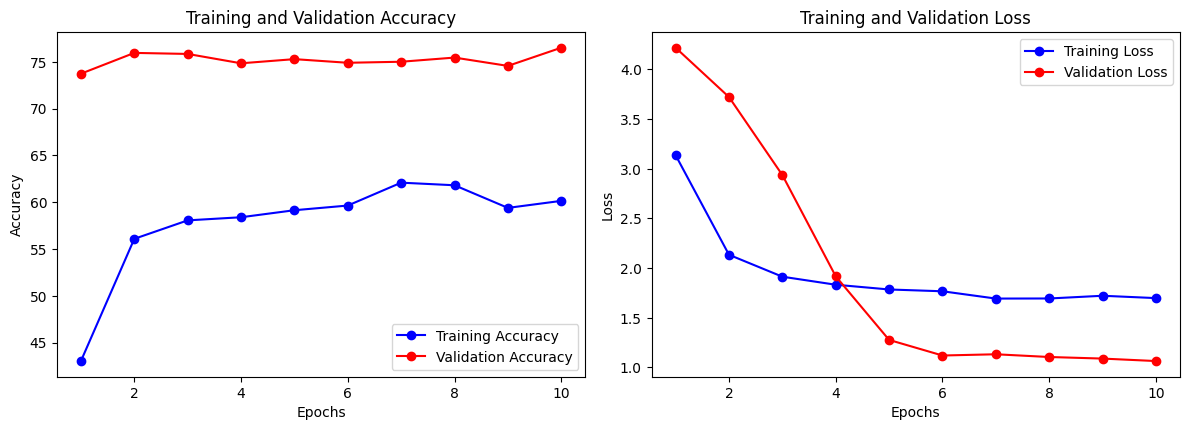

In [18]:
plot_simple_metrics(model_Efficient_net_b7_history)


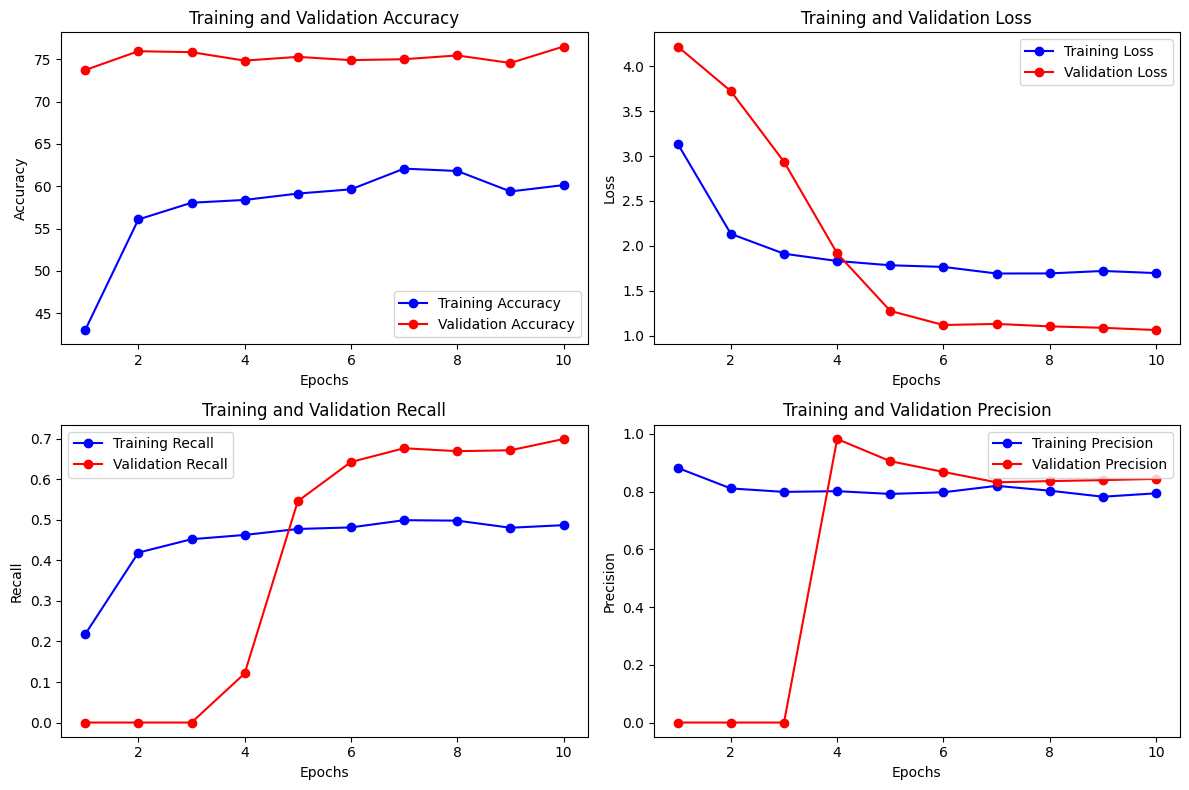

In [19]:
plot_full_metrics(model_Efficient_net_b7_history)

In [20]:
import seaborn as sn
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sn


# def create_confusion_table(model, validation_data, steps_per_epoch):
 
#     # Get the true labels from the validation dataset
#     true_labels = []
#     for images, labels in validation_data:      
#         true_labels.extend(np.argmax(labels, axis=1))
 
#     # Make predictions on the validation dataset
#     predictions = model.predict(validation_data, steps=steps_per_epoch, verbose=1)
#     predicted_labels = np.argmax(predictions, axis=1)
 
#     # Create confusion matrix
#     confusion_matrix = pd.crosstab(
#         np.array(true_labels),
#         predicted_labels,
#         rownames=['Actual'],
#         colnames=['Predicted']
#     )
 
#     return confusion_matrix

def create_confusion_table(model, validation_data):
    # Get the total number of samples and input image shape
    num_samples = validation_data.samples  # Total number of samples
    input_shape = validation_data.image_shape  # Shape of a single input image

    # Get the number of classes from the generator's class_indices
    num_classes = len(validation_data.class_indices)  # Number of classes

    # Allocate arrays for all data (images and labels)
    all_images = np.zeros((num_samples,) + input_shape, dtype=np.float32)
    all_labels = np.zeros((num_samples, num_classes), dtype=np.float32)

    # Accumulate all images and labels
    current_index = 0  # Track current insertion point

    for batch_images, batch_labels in validation_data:
        batch_size = batch_images.shape[0]
        end_index = current_index + batch_size

        # Insert batch data into the allocated arrays
        all_images[current_index:end_index] = batch_images
        all_labels[current_index:end_index] = batch_labels

        current_index = end_index  # Move the pointer

        if end_index >= num_samples:  # Stop when all samples are processed
            break

    # Make predictions on the entire dataset at once
    predictions = model.predict(all_images, steps=len(validation_data), verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Get the true labels from the accumulated labels
    true_labels = np.argmax(all_labels, axis=1)

    # Create confusion matrix using Pandas
    confusion_matrix = pd.crosstab(
        true_labels, predicted_labels, rownames=['Actual'], colnames=['Predicted']
    )

    return confusion_matrix


def create_confusion_table_with_class_names(model, validation_data):
    # Get the total number of samples and input image shape
    num_samples = validation_data.samples
    input_shape = validation_data.image_shape

    # Get the number of classes and class labels from class_indices
    class_indices = validation_data.class_indices
    class_labels = {v: k for k, v in class_indices.items()}  # Map indices to class names

    num_classes = len(class_indices)

    # Allocate arrays for all data (images and labels)
    all_images = np.zeros((num_samples,) + input_shape, dtype=np.float32)
    all_labels = np.zeros((num_samples, num_classes), dtype=np.float32)

    # Accumulate all images and labels
    current_index = 0

    for batch_images, batch_labels in validation_data:
        batch_size = batch_images.shape[0]
        end_index = current_index + batch_size

        # Insert batch data into the allocated arrays
        all_images[current_index:end_index] = batch_images
        all_labels[current_index:end_index] = batch_labels

        current_index = end_index

        if end_index >= num_samples:
            break

    # Make predictions on the entire dataset at once
    predictions = model.predict(all_images, steps=len(validation_data), verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Get the true labels from the accumulated labels
    true_labels = np.argmax(all_labels, axis=1)

    # Map the indices in true_labels and predicted_labels to class names
    true_class_names = [class_labels[label] for label in true_labels]
    predicted_class_names = [class_labels[label] for label in predicted_labels]

    # Create confusion matrix using Pandas with class names
    confusion_matrix = pd.crosstab(
        pd.Series(true_class_names, name='Actual'),
        pd.Series(predicted_class_names, name='Predicted')
    )

    return confusion_matrix

def plot_confusion_matrix(confusion_matrix):
    print("Heatmap\n")
    plt.figure(figsize=(30, 30))
    sn.heatmap(confusion_matrix, annot=True, cmap='Blues')
    plt.show()

In [21]:
confusion_matrix = create_confusion_table(model_Efficient_net_b7, val_generator)
confusion_matrix

60/60 [==============================] - 503s 8s/step


Predicted,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Actual,,,,,,,,,,,,,,,,,,,,,
0,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,17,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,0


In [22]:
confusion_matrix_with_class_names = create_confusion_table_with_class_names(model_Efficient_net_b7, val_generator)
confusion_matrix_with_class_names

60/60 [==============================] - 493s 8s/step


Predicted,antelope,badger,bat,bear,bee,beetle,bison,boar,butterfly,cat,...,starfish,swan,tiger,turkey,turtle,whale,wolf,wombat,woodpecker,zebra
Actual,,,,,,,,,,,,,,,,,,,,,
antelope,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
badger,0,18,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bat,0,0,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
bear,0,0,0,17,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
bee,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,0
wolf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
wombat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,0


Heatmap



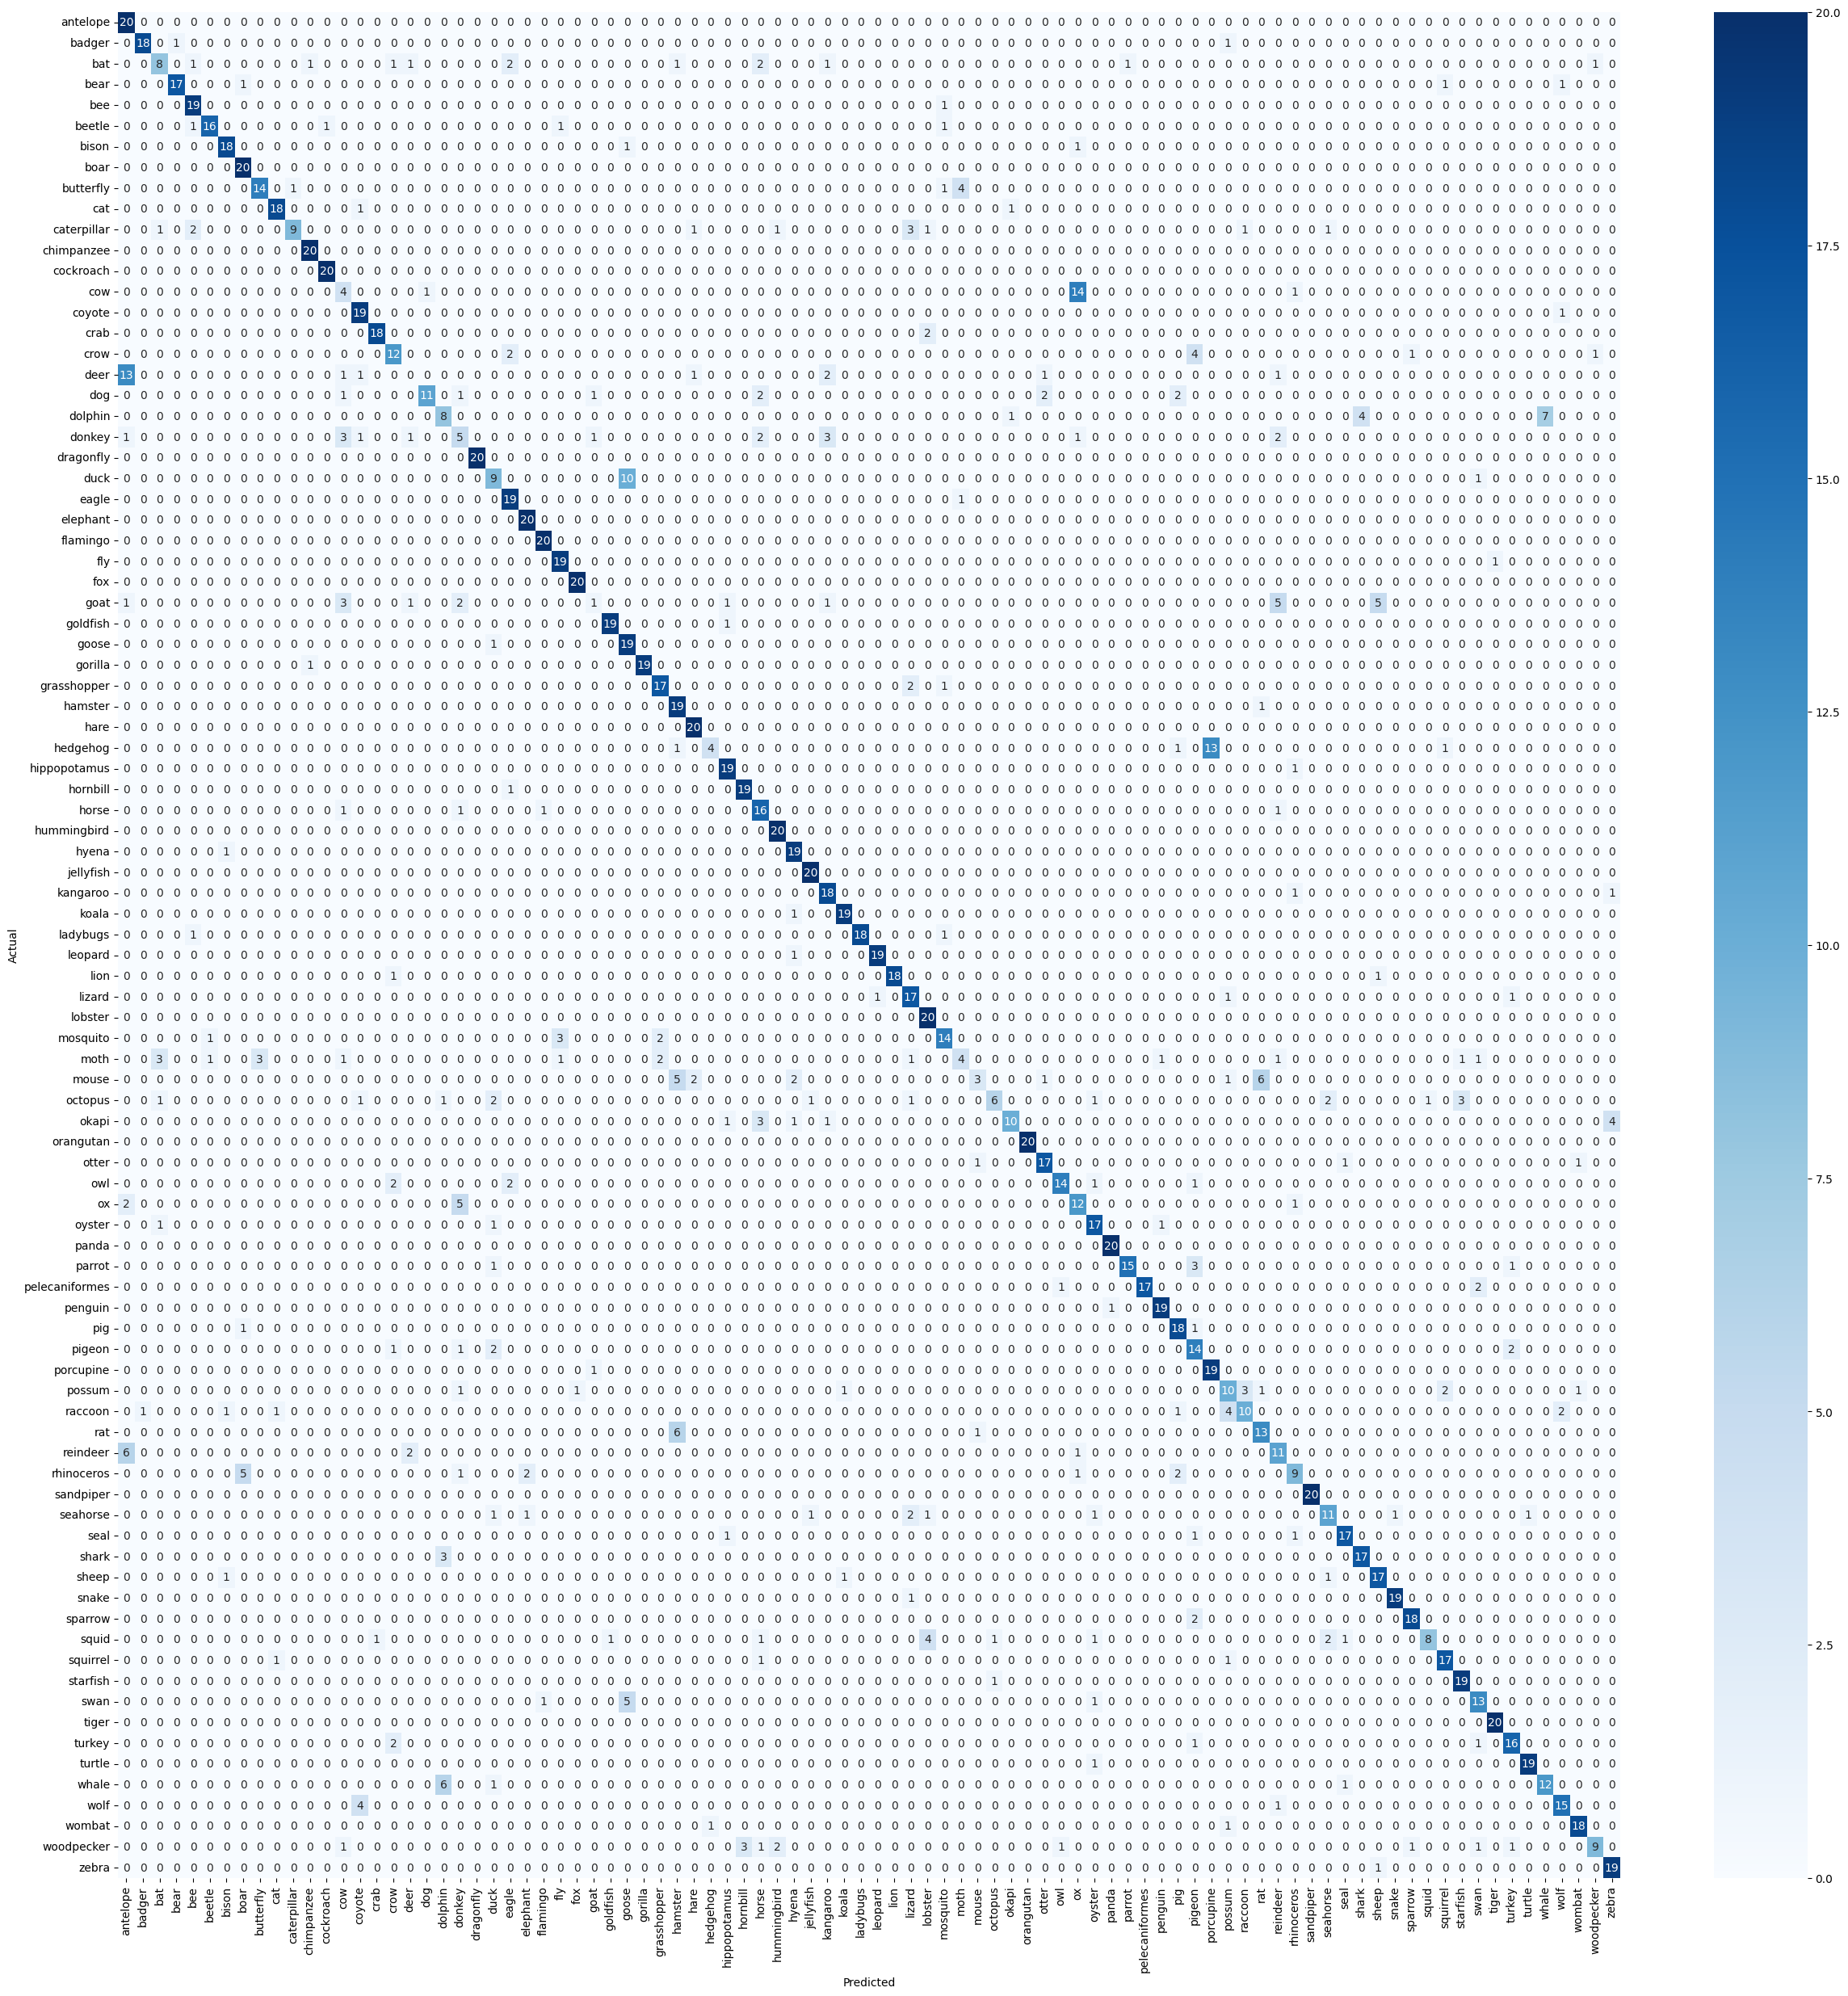

In [23]:
plot_confusion_matrix(confusion_matrix_with_class_names)

In [24]:
# Assuming `model` is your trained model and `validation_data` is a data generator
import numpy as np
from sklearn.metrics import classification_report

def classification_report_final(model, validation_data):
    # Get the total number of samples and input image shape
    num_samples = validation_data.samples  # Total number of samples
    input_shape = validation_data.image_shape  # Shape of a single input image

    # Get the number of classes from the generator's class_indices
    num_classes = len(validation_data.class_indices)  # Number of classes

    # Allocate arrays for all data (images and labels)
    all_images = np.zeros((num_samples,) + input_shape, dtype=np.float32)
    all_labels = np.zeros((num_samples, num_classes), dtype=np.float32)

    # Accumulate all images and labels
    current_index = 0  # Track current insertion point

    for batch_images, batch_labels in validation_data:
        batch_size = batch_images.shape[0]
        end_index = current_index + batch_size

        # Insert batch data into the allocated arrays
        all_images[current_index:end_index] = batch_images
        all_labels[current_index:end_index] = batch_labels

        current_index = end_index  # Move the pointer

        if end_index >= num_samples:  # Stop when all samples are processed
            break

    # Make predictions on the entire dataset at once
    predictions = model.predict(all_images, steps=len(validation_data), verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Get the true labels from the accumulated labels
    true_labels = np.argmax(all_labels, axis=1)

    # Generate the classification report
    class_labels = list(validation_data.class_indices.keys())      # Get class names
    report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print(report)

In [25]:
classification_report_final(model = model_Efficient_net_b7, validation_data = val_generator)

60/60 [==============================] - 494s 8s/step
                precision    recall  f1-score   support

      antelope       0.47      1.00      0.63        20
        badger       0.95      0.90      0.92        20
           bat       0.57      0.40      0.47        20
          bear       0.94      0.85      0.89        20
           bee       0.79      0.95      0.86        20
        beetle       0.89      0.80      0.84        20
         bison       0.86      0.90      0.88        20
          boar       0.74      1.00      0.85        20
     butterfly       0.82      0.70      0.76        20
           cat       0.90      0.90      0.90        20
   caterpillar       0.90      0.45      0.60        20
    chimpanzee       0.91      1.00      0.95        20
     cockroach       0.95      1.00      0.98        20
           cow       0.27      0.20      0.23        20
        coyote       0.70      0.95      0.81        20
          crab       0.95      0.90      0.92    